# AI设计模式全面对比与总结

本notebook对5种主要的AI设计模式进行全面对比分析，帮助您选择最适合您需求的模式。

## 涵盖的5种AI设计模式

1. **Prompt Chaining（提示链）** - 顺序链式调用
2. **Routing（路由）** - 智能分类路由
3. **Parallelization（并行化）** - 代码协调的并行处理
4. **Orchestrator-Worker（协调者-工作者）** - LLM协调的并行处理
5. **Evaluator-Optimizer（评估者-优化器）** - 迭代自我改进

---

## 1. 核心概念对比

In [ ]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np

# 核心概念对比表
core_comparison = pd.DataFrame({
    '设计模式': [
        'Prompt Chaining',
        'Routing',
        'Parallelization',
        'Orchestrator-Worker',
        'Evaluator-Optimizer'
    ],
    '核心思想': [
        '将复杂任务分解为顺序步骤',
        '根据输入特征智能分类',
        '代码控制的并行任务执行',
        'LLM智能协调的并行执行',
        '通过迭代评估持续优化'
    ],
    '执行方式': [
        '串行（Sequential）',
        '条件分支（Conditional）',
        '并行（Parallel）',
        '智能并行（Intelligent Parallel）',
        '迭代循环（Iterative）'
    ],
    '协调机制': [
        '硬编码顺序',
        '分类器决策',
        '代码协调',
        'LLM协调',
        '评估反馈循环'
    ],
    '典型组件数': [
        '3-5个LLM',
        '1个Router + N个Expert',
        '3-10个Worker',
        '1个Orchestrator + N个Worker + 1个Synthesizer',
        '1个Generator + 1个Evaluator'
    ]
})

display(Markdown("### 核心概念对比"))
display(core_comparison)

### 核心概念对比

,设计模式,核心思想,执行方式,协调机制,典型组件数
0,Prompt Chaining,将复杂任务分解为顺序步骤,串行（Sequential）,硬编码顺序,3-5个LLM
1,Routing,根据输入特征智能分类,条件分支（Conditional）,分类器决策,1个Router + N个Expert
2,Parallelization,代码控制的并行任务执行,并行（Parallel）,代码协调,3-10个Worker
3,Orchestrator-Worker,LLM智能协调的并行执行,智能并行（Intelligent Parallel）,LLM协调,1个Orchestrator + N个Worker + 1个Synthesizer
4,Evaluator-Optimizer,通过迭代评估持续优化,迭代循环（Iterative）,评估反馈循环,1个Generator + 1个Evaluator


## 2. 详细特性对比

In [ ]:
# 详细特性对比表
detailed_comparison = pd.DataFrame({
    '维度': [
        'Prompt Chaining',
        'Routing',
        'Parallelization',
        'Orchestrator-Worker',
        'Evaluator-Optimizer'
    ],
    '复杂度': ['低', '中', '中', '高', '高'],
    '灵活性': ['低', '中', '中', '高', '高'],
    '执行速度': ['慢（串行）', '快（单次）', '快（并行）', '中（并行+协调）', '慢（迭代）'],
    '成本': ['中', '低', '中-高', '高', '高'],
    '可预测性': ['高', '中', '高', '中', '低'],
    '输出质量': ['标准', '标准', '标准', '高', '最高'],
    '可扩展性': ['容易', '容易', '容易', '中等', '中等'],
    '调试难度': ['简单', '简单', '中等', '困难', '困难'],
    '适合任务类型': [
        '流程化任务',
        '分类任务',
        '可分解任务',
        '复杂分析任务',
        '高质量要求任务'
    ]
})

display(Markdown("### 详细特性对比"))
display(detailed_comparison)

### 详细特性对比

,维度,复杂度,灵活性,执行速度,成本,可预测性,输出质量,可扩展性,调试难度,适合任务类型
0,Prompt Chaining,低,低,慢（串行）,中,高,标准,容易,简单,流程化任务
1,Routing,中,中,快（单次）,低,中,标准,容易,简单,分类任务
2,Parallelization,中,中,快（并行）,中-高,高,标准,容易,中等,可分解任务
3,Orchestrator-Worker,高,高,中（并行+协调）,高,中,高,中等,困难,复杂分析任务
4,Evaluator-Optimizer,高,高,慢（迭代）,高,低,最高,中等,困难,高质量要求任务


## 3. 适用场景详解

In [ ]:
# 适用场景对比
use_cases = {
    'Prompt Chaining': {
        '最适合': [
            '内容生成流水线（大纲→详细内容→优化）',
            '文档处理流程（提取→转换→总结）',
            '数据分析流程（清洗→分析→可视化）',
            '多步骤推理任务'
        ],
        '不适合': [
            '需要快速响应的场景',
            '任务间无明确依赖关系',
            '需要动态调整流程'
        ],
        '实际案例': [
            '博客文章生成器',
            '研究报告自动化',
            '客户支持工单处理'
        ]
    },
    'Routing': {
        '最适合': [
            '客户服务系统（技术/销售/支持分流）',
            '内容审核系统（不同内容类型处理）',
            '智能搜索（不同查询类型）',
            '多领域问答系统'
        ],
        '不适合': [
            '复杂的多维度任务',
            '需要综合多个领域的任务',
            '分类边界模糊的场景'
        ],
        '实际案例': [
            '智能客服系统',
            '多语言翻译平台',
            '问题分类系统'
        ]
    },
    'Parallelization': {
        '最适合': [
            '批量内容生成（多篇文章同时）',
            '多维度分析（市场/技术/运营）',
            '大规模数据处理',
            '多语言翻译',
            'A/B测试内容生成'
        ],
        '不适合': [
            '任务间有强依赖关系',
            '需要动态任务分解',
            '成本敏感的场景'
        ],
        '实际案例': [
            '多渠道营销内容生成',
            '产品多维度评估',
            '批量简历筛选'
        ]
    },
    'Orchestrator-Worker': {
        '最适合': [
            '复杂战略分析',
            '需要深度洞察的研究',
            '任务边界不明确的项目',
            '需要发现关联的多维分析',
            '创新性决策支持'
        ],
        '不适合': [
            '简单重复性任务',
            '成本敏感场景',
            '需要快速响应的应用',
            '输出格式严格的任务'
        ],
        '实际案例': [
            '企业战略规划',
            '产品市场分析',
            '投资决策分析'
        ]
    },
    'Evaluator-Optimizer': {
        '最适合': [
            '高质量内容创作（文章、代码）',
            '需要满足严格标准的输出',
            '创意优化（广告文案、设计）',
            '解决方案持续改进',
            '质量敏感的应用'
        ],
        '不适合': [
            '实时应用',
            '成本敏感场景',
            '标准模糊的任务',
            '简单直接的任务'
        ],
        '实际案例': [
            '高质量代码生成',
            '广告文案优化',
            '学术论文写作'
        ]
    }
}

# 展示每个模式的适用场景
for pattern, details in use_cases.items():
    display(Markdown(f"### {pattern}"))
    
    display(Markdown("**✅ 最适合的场景：**"))
    for case in details['最适合']:
        display(Markdown(f"- {case}"))
    
    display(Markdown("\n**❌ 不适合的场景：**"))
    for case in details['不适合']:
        display(Markdown(f"- {case}"))
    
    display(Markdown("\n**💼 实际应用案例：**"))
    for case in details['实际案例']:
        display(Markdown(f"- {case}"))
    
    display(Markdown("\n---\n"))

### Prompt Chaining

**✅ 最适合的场景：**

- 内容生成流水线（大纲→详细内容→优化）

- 文档处理流程（提取→转换→总结）

- 数据分析流程（清洗→分析→可视化）

- 多步骤推理任务


**❌ 不适合的场景：**

- 需要快速响应的场景

- 任务间无明确依赖关系

- 需要动态调整流程


**💼 实际应用案例：**

- 博客文章生成器

- 研究报告自动化

- 客户支持工单处理


---


### Routing

**✅ 最适合的场景：**

- 客户服务系统（技术/销售/支持分流）

- 内容审核系统（不同内容类型处理）

- 智能搜索（不同查询类型）

- 多领域问答系统


**❌ 不适合的场景：**

- 复杂的多维度任务

- 需要综合多个领域的任务

- 分类边界模糊的场景


**💼 实际应用案例：**

- 智能客服系统

- 多语言翻译平台

- 问题分类系统


---


### Parallelization

**✅ 最适合的场景：**

- 批量内容生成（多篇文章同时）

- 多维度分析（市场/技术/运营）

- 大规模数据处理

- 多语言翻译

- A/B测试内容生成


**❌ 不适合的场景：**

- 任务间有强依赖关系

- 需要动态任务分解

- 成本敏感的场景


**💼 实际应用案例：**

- 多渠道营销内容生成

- 产品多维度评估

- 批量简历筛选


---


### Orchestrator-Worker

**✅ 最适合的场景：**

- 复杂战略分析

- 需要深度洞察的研究

- 任务边界不明确的项目

- 需要发现关联的多维分析

- 创新性决策支持


**❌ 不适合的场景：**

- 简单重复性任务

- 成本敏感场景

- 需要快速响应的应用

- 输出格式严格的任务


**💼 实际应用案例：**

- 企业战略规划

- 产品市场分析

- 投资决策分析


---


### Evaluator-Optimizer

**✅ 最适合的场景：**

- 高质量内容创作（文章、代码）

- 需要满足严格标准的输出

- 创意优化（广告文案、设计）

- 解决方案持续改进

- 质量敏感的应用


**❌ 不适合的场景：**

- 实时应用

- 成本敏感场景

- 标准模糊的任务

- 简单直接的任务


**💼 实际应用案例：**

- 高质量代码生成

- 广告文案优化

- 学术论文写作


---


## 4. 性能与成本对比

In [ ]:
# 性能与成本对比数据
performance_cost = pd.DataFrame({
    '模式': [
        'Prompt Chaining',
        'Routing',
        'Parallelization',
        'Orchestrator-Worker',
        'Evaluator-Optimizer'
    ],
    '平均响应时间': ['长（串行累加）', '短（单次调用）', '中（最慢Worker）', '长（协调+并行）', '很长（多轮迭代）'],
    'API调用次数': ['3-5次', '2次', '3-10次', '5-15次', '5-20次'],
    '相对成本': ['中（$）', '低（$）', '中-高（$$）', '高（$$$）', '高（$$$）'],
    '可扩展性': ['线性增长', '常数', '并行扩展', '并行扩展', '迭代增长'],
    '吞吐量': ['低', '高', '高', '中', '低'],
    '资源利用率': ['低（串行）', '高（单次）', '高（并行）', '中（协调开销）', '中（迭代）']
})

display(Markdown("### 性能与成本对比"))
display(performance_cost)

# 成本估算示例
display(Markdown("\n### 成本估算示例（基于GPT-4级别模型）\n"))
display(Markdown("""
假设单次LLM调用成本为 $0.01：

| 模式 | 典型调用次数 | 估算成本 | 成本效益 |
|------|------------|---------|----------|
| Prompt Chaining | 3-5次 | $0.03-$0.05 | 中等 |
| Routing | 2次 | $0.02 | 最优 |
| Parallelization | 3-10次 | $0.03-$0.10 | 较高 |
| Orchestrator-Worker | 5-15次 | $0.05-$0.15 | 高（质量优） |
| Evaluator-Optimizer | 6-20次 | $0.06-$0.20 | 高（质量优） |

**注意**：实际成本取决于模型选择、输入输出长度、迭代次数等因素。
"""))

### 性能与成本对比

,模式,平均响应时间,API调用次数,相对成本,可扩展性,吞吐量,资源利用率
0,Prompt Chaining,长（串行累加）,3-5次,中（$）,线性增长,低,低（串行）
1,Routing,短（单次调用）,2次,低（$）,常数,高,高（单次）
2,Parallelization,中（最慢Worker）,3-10次,中-高（$$）,并行扩展,高,高（并行）
3,Orchestrator-Worker,长（协调+并行）,5-15次,高（$$$）,并行扩展,中,中（协调开销）
4,Evaluator-Optimizer,很长（多轮迭代）,5-20次,高（$$$）,迭代增长,低,中（迭代）



### 成本估算示例（基于GPT-4级别模型）



假设单次LLM调用成本为 $0.01：

| 模式 | 典型调用次数 | 估算成本 | 成本效益 |
|------|------------|---------|----------|
| Prompt Chaining | 3-5次 | $0.03-$0.05 | 中等 |
| Routing | 2次 | $0.02 | 最优 |
| Parallelization | 3-10次 | $0.03-$0.10 | 较高 |
| Orchestrator-Worker | 5-15次 | $0.05-$0.15 | 高（质量优） |
| Evaluator-Optimizer | 6-20次 | $0.06-$0.20 | 高（质量优） |

**注意**：实际成本取决于模型选择、输入输出长度、迭代次数等因素。


## 5. 模式选择决策树

In [7]:
display(Markdown("""
### 如何选择合适的AI设计模式？

```
                        开始：我有一个AI任务
                                 │
                                 ▼
                    ┌────────────────────────┐
                    │ 需要根据输入类型       │
                    │ 选择不同的处理方式？   │
                    └─────┬──────────┬───────┘
                          │是        │否
                          ▼          ▼
                    📍 Routing    ┌────────────────┐
                                  │ 任务可以分解为 │
                                  │ 独立的子任务？ │
                                  └─────┬────┬─────┘
                                        │是  │否
                                        ▼    ▼
                            ┌──────────────┐  ┌──────────────┐
                            │ 任务分解规则 │  │ 需要迭代优化 │
                            │ 明确固定？   │  │ 直到满意？   │
                            └─────┬───┬────┘  └─────┬───┬────┘
                                  │是 │否           │是 │否
                                  ▼   ▼             ▼   ▼
                    📍 Parallelization  │   📍 Evaluator  │
                                        │    -Optimizer   │
                                        ▼                 ▼
                            📍 Orchestrator      ┌────────────┐
                               -Worker           │ 任务有明确 │
                                                 │ 的顺序步骤？│
                                                 └─────┬──────┘
                                                       │是
                                                       ▼
                                              📍 Prompt Chaining
```

### 快速选择指南

**优先考虑 Routing 如果：**
- ✓ 输入可以明确分类
- ✓ 不同类别需要不同的专家处理
- ✓ 需要快速响应和低成本

**优先考虑 Prompt Chaining 如果：**
- ✓ 任务有清晰的步骤顺序
- ✓ 后续步骤依赖前面的结果
- ✓ 流程相对固定

**优先考虑 Parallelization 如果：**
- ✓ 子任务可以独立并行执行
- ✓ 关注执行速度
- ✓ 任务分解逻辑明确

**优先考虑 Orchestrator-Worker 如果：**
- ✓ 任务复杂，需要智能分解
- ✓ 需要深度综合分析
- ✓ 注重输出质量而非成本

**优先考虑 Evaluator-Optimizer 如果：**
- ✓ 质量要求极高
- ✓ 可接受多轮迭代的时间成本
- ✓ 有明确的评估标准
"""))


### 如何选择合适的AI设计模式？

```
                        开始：我有一个AI任务
                                 │
                                 ▼
                    ┌────────────────────────┐
                    │ 需要根据输入类型       │
                    │ 选择不同的处理方式？   │
                    └─────┬──────────┬───────┘
                          │是        │否
                          ▼          ▼
                    📍 Routing    ┌────────────────┐
                                  │ 任务可以分解为 │
                                  │ 独立的子任务？ │
                                  └─────┬────┬─────┘
                                        │是  │否
                                        ▼    ▼
                            ┌──────────────┐  ┌──────────────┐
                            │ 任务分解规则 │  │ 需要迭代优化 │
                            │ 明确固定？   │  │ 直到满意？   │
                            └─────┬───┬────┘  └─────┬───┬────┘
                                  │是 │否           │是 │否
                                  ▼   ▼             ▼   ▼
                    📍 Parallelization  │   📍 Evaluator  │
                                        │    -Optimizer   │
                                        ▼                 ▼
                            📍 Orchestrator      ┌────────────┐
                               -Worker           │ 任务有明确 │
                                                 │ 的顺序步骤？│
                                                 └─────┬──────┘
                                                       │是
                                                       ▼
                                              📍 Prompt Chaining
```

### 快速选择指南

**优先考虑 Routing 如果：**
- ✓ 输入可以明确分类
- ✓ 不同类别需要不同的专家处理
- ✓ 需要快速响应和低成本

**优先考虑 Prompt Chaining 如果：**
- ✓ 任务有清晰的步骤顺序
- ✓ 后续步骤依赖前面的结果
- ✓ 流程相对固定

**优先考虑 Parallelization 如果：**
- ✓ 子任务可以独立并行执行
- ✓ 关注执行速度
- ✓ 任务分解逻辑明确

**优先考虑 Orchestrator-Worker 如果：**
- ✓ 任务复杂，需要智能分解
- ✓ 需要深度综合分析
- ✓ 注重输出质量而非成本

**优先考虑 Evaluator-Optimizer 如果：**
- ✓ 质量要求极高
- ✓ 可接受多轮迭代的时间成本
- ✓ 有明确的评估标准


## 6. 模式组合与混合使用

In [ ]:
display(Markdown("""
### 模式可以组合使用！

在实际应用中，这些模式不是互斥的，可以巧妙组合使用：

#### 常见组合模式

**1. Routing + Prompt Chaining**
```
Router → 选择专家 → Chaining流程
```
- **场景**：客户服务系统，先分流后处理
- **优势**：结合快速分类和深度处理

**2. Parallelization + Evaluator-Optimizer**
```
Parallel生成多个方案 → Evaluator选最佳 → Optimizer优化
```
- **场景**：创意内容生成
- **优势**：快速生成+质量保证

**3. Orchestrator-Worker + Evaluator-Optimizer**
```
Orchestrator分解 → Workers并行 → Synthesizer综合 → Evaluator评估 → 迭代优化
```
- **场景**：高价值战略决策
- **优势**：智能分解+深度分析+质量保证

**4. Routing + Parallelization**
```
Router分类 → 每个类别并行处理多个实例
```
- **场景**：批量多类型内容处理
- **优势**：分类准确+高吞吐量

**5. Prompt Chaining + Evaluator**
```
Chain处理 → Evaluator检查 → 不合格则重新Chain
```
- **场景**：需要质量保证的流程化任务
- **优势**：流程清晰+质量控制

#### 组合原则

1. **互补性**：组合的模式应该解决不同的问题
2. **成本效益**：评估组合后的总成本是否可接受
3. **复杂度管理**：避免过度复杂影响维护
4. **性能平衡**：考虑整体的速度和质量平衡
"""))


### 模式可以组合使用！

在实际应用中，这些模式不是互斥的，可以巧妙组合使用：

#### 常见组合模式

**1. Routing + Prompt Chaining**
```
Router → 选择专家 → Chaining流程
```
- **场景**：客户服务系统，先分流后处理
- **优势**：结合快速分类和深度处理

**2. Parallelization + Evaluator-Optimizer**
```
Parallel生成多个方案 → Evaluator选最佳 → Optimizer优化
```
- **场景**：创意内容生成
- **优势**：快速生成+质量保证

**3. Orchestrator-Worker + Evaluator-Optimizer**
```
Orchestrator分解 → Workers并行 → Synthesizer综合 → Evaluator评估 → 迭代优化
```
- **场景**：高价值战略决策
- **优势**：智能分解+深度分析+质量保证

**4. Routing + Parallelization**
```
Router分类 → 每个类别并行处理多个实例
```
- **场景**：批量多类型内容处理
- **优势**：分类准确+高吞吐量

**5. Prompt Chaining + Evaluator**
```
Chain处理 → Evaluator检查 → 不合格则重新Chain
```
- **场景**：需要质量保证的流程化任务
- **优势**：流程清晰+质量控制

#### 组合原则

1. **互补性**：组合的模式应该解决不同的问题
2. **成本效益**：评估组合后的总成本是否可接受
3. **复杂度管理**：避免过度复杂影响维护
4. **性能平衡**：考虑整体的速度和质量平衡


## 7. 未来趋势与新兴模式

In [ ]:
display(Markdown("""
### 未来AI设计模式的发展方向

#### 🔮 新兴模式预测

**1. Adaptive Orchestration（自适应编排）**
- **概念**：系统根据任务执行情况动态调整策略
- **特点**：
  - 实时监控子任务执行状态
  - 根据中间结果调整后续任务
  - 自动失败重试和降级策略
- **适用场景**：高可靠性要求的生产环境
- **成熟度**：研究阶段

**2. Hierarchical Reasoning（层级推理）**
- **概念**：多层LLM形成决策层级，高层制定策略，低层执行
- **特点**：
  - 战略层LLM进行高层规划
  - 战术层LLM细化执行方案
  - 操作层LLM完成具体任务
- **适用场景**：复杂的多步骤决策
- **成熟度**：早期探索

**3. Collaborative Multi-Agent（协作多智能体）**
- **概念**：多个LLM智能体相互协作、讨论、达成共识
- **特点**：
  - 智能体间可以对话交流
  - 通过辩论提升决策质量
  - 自组织形成最优协作结构
- **适用场景**：需要多视角的复杂决策
- **成熟度**：快速发展中

**4. Memory-Augmented Patterns（记忆增强模式）**
- **概念**：系统维护长期记忆，从历史执行中学习
- **特点**：
  - 记录成功/失败案例
  - 自动提取最佳实践
  - 持续改进系统性能
- **适用场景**：长期运行的生产系统
- **成熟度**：部分实现

**5. Hybrid Symbolic-Neural（符号-神经混合）**
- **概念**：结合符号推理和神经网络的优势
- **特点**：
  - LLM处理语义理解
  - 符号系统处理逻辑推理
  - 知识图谱辅助决策
- **适用场景**：需要严格逻辑的领域（法律、数学）
- **成熟度**：研究前沿

**6. Federated AI Patterns（联邦AI模式）**
- **概念**：多个私有LLM协作但不共享数据
- **特点**：
  - 保护数据隐私
  - 分布式协作
  - 聚合学习成果
- **适用场景**：隐私敏感的企业应用
- **成熟度**：概念验证

#### 🚀 技术驱动因素

1. **模型能力提升**
   - 更长的上下文窗口 → 更复杂的协作模式
   - 更强的推理能力 → 自适应和自组织
   - 多模态能力 → 跨模态的模式设计

2. **基础设施进步**
   - 更快的推理速度 → 实时协调成为可能
   - 更低的成本 → 复杂模式更经济
   - 边缘计算 → 分布式模式部署

3. **应用需求演进**
   - 更高的可靠性要求 → 自适应和容错模式
   - 更复杂的业务场景 → 层级和混合模式
   - 隐私合规压力 → 联邦和安全模式

#### 💡 设计原则的演进

**从静态到动态**
- 当前：预定义的固定流程
- 未来：运行时自适应调整

**从单次到持续**
- 当前：每次任务独立执行
- 未来：跨任务学习和改进

**从中心化到分布式**
- 当前：中央协调控制
- 未来：自组织的分布式协作

**从确定到概率**
- 当前：追求确定性的输出
- 未来：拥抱不确定性，多方案决策
"""))


### 未来AI设计模式的发展方向

#### 🔮 新兴模式预测

**1. Adaptive Orchestration（自适应编排）**
- **概念**：系统根据任务执行情况动态调整策略
- **特点**：
  - 实时监控子任务执行状态
  - 根据中间结果调整后续任务
  - 自动失败重试和降级策略
- **适用场景**：高可靠性要求的生产环境
- **成熟度**：研究阶段

**2. Hierarchical Reasoning（层级推理）**
- **概念**：多层LLM形成决策层级，高层制定策略，低层执行
- **特点**：
  - 战略层LLM进行高层规划
  - 战术层LLM细化执行方案
  - 操作层LLM完成具体任务
- **适用场景**：复杂的多步骤决策
- **成熟度**：早期探索

**3. Collaborative Multi-Agent（协作多智能体）**
- **概念**：多个LLM智能体相互协作、讨论、达成共识
- **特点**：
  - 智能体间可以对话交流
  - 通过辩论提升决策质量
  - 自组织形成最优协作结构
- **适用场景**：需要多视角的复杂决策
- **成熟度**：快速发展中

**4. Memory-Augmented Patterns（记忆增强模式）**
- **概念**：系统维护长期记忆，从历史执行中学习
- **特点**：
  - 记录成功/失败案例
  - 自动提取最佳实践
  - 持续改进系统性能
- **适用场景**：长期运行的生产系统
- **成熟度**：部分实现

**5. Hybrid Symbolic-Neural（符号-神经混合）**
- **概念**：结合符号推理和神经网络的优势
- **特点**：
  - LLM处理语义理解
  - 符号系统处理逻辑推理
  - 知识图谱辅助决策
- **适用场景**：需要严格逻辑的领域（法律、数学）
- **成熟度**：研究前沿

**6. Federated AI Patterns（联邦AI模式）**
- **概念**：多个私有LLM协作但不共享数据
- **特点**：
  - 保护数据隐私
  - 分布式协作
  - 聚合学习成果
- **适用场景**：隐私敏感的企业应用
- **成熟度**：概念验证

#### 🚀 技术驱动因素

1. **模型能力提升**
   - 更长的上下文窗口 → 更复杂的协作模式
   - 更强的推理能力 → 自适应和自组织
   - 多模态能力 → 跨模态的模式设计

2. **基础设施进步**
   - 更快的推理速度 → 实时协调成为可能
   - 更低的成本 → 复杂模式更经济
   - 边缘计算 → 分布式模式部署

3. **应用需求演进**
   - 更高的可靠性要求 → 自适应和容错模式
   - 更复杂的业务场景 → 层级和混合模式
   - 隐私合规压力 → 联邦和安全模式

#### 💡 设计原则的演进

**从静态到动态**
- 当前：预定义的固定流程
- 未来：运行时自适应调整

**从单次到持续**
- 当前：每次任务独立执行
- 未来：跨任务学习和改进

**从中心化到分布式**
- 当前：中央协调控制
- 未来：自组织的分布式协作

**从确定到概率**
- 当前：追求确定性的输出
- 未来：拥抱不确定性，多方案决策


## 8. 实施建议与最佳实践

In [ ]:
display(Markdown("""
### 实施AI设计模式的最佳实践

#### 🎯 选择模式的考虑因素

**1. 业务需求优先**
```
质量要求 > 速度要求 > 成本限制
```
- 明确质量标准和可接受的成本范围
- 评估速度对业务的影响
- 在三者间找到最佳平衡点

**2. 从简单开始**
```
单次调用 → Prompt Chaining → Parallelization → 复杂模式
```
- 先验证单次LLM调用能否满足需求
- 逐步增加复杂度
- 避免过度工程化

**3. 数据驱动决策**
- 测量实际的质量、速度、成本指标
- A/B测试不同模式
- 建立监控和告警机制

#### 🛠️ 实施步骤

**阶段1：需求分析（1-2天）**
- [ ] 明确业务目标和成功标准
- [ ] 分析任务特性（可分解性、依赖关系等）
- [ ] 评估约束条件（预算、时间、技术）
- [ ] 初步选择2-3个候选模式

**阶段2：原型验证（3-5天）**
- [ ] 实现最简单的候选模式
- [ ] 用真实数据测试
- [ ] 测量关键指标
- [ ] 对比多个模式的表现

**阶段3：优化迭代（1-2周）**
- [ ] 调整提示词和参数
- [ ] 优化模型选择
- [ ] 添加错误处理
- [ ] 性能调优

**阶段4：生产部署（持续）**
- [ ] 添加监控和日志
- [ ] 建立回退机制
- [ ] 收集用户反馈
- [ ] 持续优化改进

#### ⚠️ 常见陷阱与避免方法

**陷阱1：过度复杂化**
- ❌ 问题：为简单任务使用复杂模式
- ✅ 解决：遵循"够用就好"原则

**陷阱2：忽视成本**
- ❌ 问题：未计算实际API调用成本
- ✅ 解决：建立成本监控和预算告警

**陷阱3：缺乏错误处理**
- ❌ 问题：单点故障导致整个流程失败
- ✅ 解决：添加重试、降级、超时机制

**陷阱4：提示词质量低**
- ❌ 问题：模式设计好但提示词差
- ✅ 解决：投入时间优化提示词

**陷阱5：缺乏版本控制**
- ❌ 问题：无法追踪变更和回滚
- ✅ 解决：版本化提示词和配置

#### 📊 监控指标建议

**质量指标**
- 输出准确率/满意度
- 错误率和异常情况
- 用户反馈评分

**性能指标**
- 端到端响应时间
- 各阶段耗时分布
- 吞吐量（QPS）

**成本指标**
- API调用次数
- Token消耗量
- 单次任务平均成本

**可靠性指标**
- 成功率
- 重试次数
- 降级触发频率
"""))


### 实施AI设计模式的最佳实践

#### 🎯 选择模式的考虑因素

**1. 业务需求优先**
```
质量要求 > 速度要求 > 成本限制
```
- 明确质量标准和可接受的成本范围
- 评估速度对业务的影响
- 在三者间找到最佳平衡点

**2. 从简单开始**
```
单次调用 → Prompt Chaining → Parallelization → 复杂模式
```
- 先验证单次LLM调用能否满足需求
- 逐步增加复杂度
- 避免过度工程化

**3. 数据驱动决策**
- 测量实际的质量、速度、成本指标
- A/B测试不同模式
- 建立监控和告警机制

#### 🛠️ 实施步骤

**阶段1：需求分析（1-2天）**
- [ ] 明确业务目标和成功标准
- [ ] 分析任务特性（可分解性、依赖关系等）
- [ ] 评估约束条件（预算、时间、技术）
- [ ] 初步选择2-3个候选模式

**阶段2：原型验证（3-5天）**
- [ ] 实现最简单的候选模式
- [ ] 用真实数据测试
- [ ] 测量关键指标
- [ ] 对比多个模式的表现

**阶段3：优化迭代（1-2周）**
- [ ] 调整提示词和参数
- [ ] 优化模型选择
- [ ] 添加错误处理
- [ ] 性能调优

**阶段4：生产部署（持续）**
- [ ] 添加监控和日志
- [ ] 建立回退机制
- [ ] 收集用户反馈
- [ ] 持续优化改进

#### ⚠️ 常见陷阱与避免方法

**陷阱1：过度复杂化**
- ❌ 问题：为简单任务使用复杂模式
- ✅ 解决：遵循"够用就好"原则

**陷阱2：忽视成本**
- ❌ 问题：未计算实际API调用成本
- ✅ 解决：建立成本监控和预算告警

**陷阱3：缺乏错误处理**
- ❌ 问题：单点故障导致整个流程失败
- ✅ 解决：添加重试、降级、超时机制

**陷阱4：提示词质量低**
- ❌ 问题：模式设计好但提示词差
- ✅ 解决：投入时间优化提示词

**陷阱5：缺乏版本控制**
- ❌ 问题：无法追踪变更和回滚
- ✅ 解决：版本化提示词和配置

#### 📊 监控指标建议

**质量指标**
- 输出准确率/满意度
- 错误率和异常情况
- 用户反馈评分

**性能指标**
- 端到端响应时间
- 各阶段耗时分布
- 吞吐量（QPS）

**成本指标**
- API调用次数
- Token消耗量
- 单次任务平均成本

**可靠性指标**
- 成功率
- 重试次数
- 降级触发频率


## 9. 总结与建议

In [ ]:
display(Markdown("""
### 快速参考卡

| 如果你需要... | 推荐模式 | 备选方案 |
|-------------|----------|----------|
| 最快的响应速度 | Routing | 单次LLM |
| 最低的成本 | Routing | Prompt Chaining |
| 最高的质量 | Evaluator-Optimizer | Orchestrator-Worker |
| 最好的可扩展性 | Parallelization | Routing |
| 最灵活的系统 | Orchestrator-Worker | Adaptive Orchestration |
| 处理分类任务 | Routing | - |
| 处理流程任务 | Prompt Chaining | - |
| 并行处理 | Parallelization | Orchestrator-Worker |
| 复杂分析 | Orchestrator-Worker | Parallelization |
| 迭代优化 | Evaluator-Optimizer | - |

### 关键要点

1. **没有万能的模式** - 根据具体需求选择
2. **可以组合使用** - 发挥各模式的优势
3. **从简单开始** - 避免过度设计
4. **持续监控优化** - 基于数据改进
5. **关注成本效益** - 平衡质量和成本
6. **拥抱新模式** - 技术在快速演进

### 学习路径建议

**初学者**（0-3个月）
1. 从单次LLM调用开始
2. 学习Prompt Chaining
3. 尝试Routing
4. 理解各模式的基本原理

**中级开发者**（3-6个月）
1. 深入Parallelization
2. 探索Evaluator-Optimizer
3. 尝试模式组合
4. 建立最佳实践库

**高级实践者**（6个月+）
1. 掌握Orchestrator-Worker
2. 研究新兴模式
3. 设计自定义模式
4. 贡献开源实现

### 进一步学习资源

**推荐阅读**
- LangChain文档：https://python.langchain.com/
- Anthropic Prompt Engineering：https://docs.anthropic.com/
- OpenAI Cookbook：https://github.com/openai/openai-cookbook

**开源项目**
- LangChain：完整的LLM应用框架
- LlamaIndex：数据增强LLM应用
- AutoGPT：自主AI代理

**社区资源**
- r/LocalLLaMA：本地LLM社区
- HuggingFace：模型和数据集
- Papers with Code：最新研究

---

## 🎓 结语

AI设计模式是构建强大LLM应用的基础。随着技术的发展，新的模式不断涌现。
关键是理解每个模式的核心思想，根据实际需求灵活选择和组合。

**记住**：最好的模式是能够解决你的实际问题、在你的约束条件下表现最优的模式。

祝你在AI应用开发中取得成功！🚀
"""))


### 快速参考卡

| 如果你需要... | 推荐模式 | 备选方案 |
|-------------|----------|----------|
| 最快的响应速度 | Routing | 单次LLM |
| 最低的成本 | Routing | Prompt Chaining |
| 最高的质量 | Evaluator-Optimizer | Orchestrator-Worker |
| 最好的可扩展性 | Parallelization | Routing |
| 最灵活的系统 | Orchestrator-Worker | Adaptive Orchestration |
| 处理分类任务 | Routing | - |
| 处理流程任务 | Prompt Chaining | - |
| 并行处理 | Parallelization | Orchestrator-Worker |
| 复杂分析 | Orchestrator-Worker | Parallelization |
| 迭代优化 | Evaluator-Optimizer | - |

### 关键要点

1. **没有万能的模式** - 根据具体需求选择
2. **可以组合使用** - 发挥各模式的优势
3. **从简单开始** - 避免过度设计
4. **持续监控优化** - 基于数据改进
5. **关注成本效益** - 平衡质量和成本
6. **拥抱新模式** - 技术在快速演进

### 学习路径建议

**初学者**（0-3个月）
1. 从单次LLM调用开始
2. 学习Prompt Chaining
3. 尝试Routing
4. 理解各模式的基本原理

**中级开发者**（3-6个月）
1. 深入Parallelization
2. 探索Evaluator-Optimizer
3. 尝试模式组合
4. 建立最佳实践库

**高级实践者**（6个月+）
1. 掌握Orchestrator-Worker
2. 研究新兴模式
3. 设计自定义模式
4. 贡献开源实现

### 进一步学习资源

**推荐阅读**
- LangChain文档：https://python.langchain.com/
- Anthropic Prompt Engineering：https://docs.anthropic.com/
- OpenAI Cookbook：https://github.com/openai/openai-cookbook

**开源项目**
- LangChain：完整的LLM应用框架
- LlamaIndex：数据增强LLM应用
- AutoGPT：自主AI代理

**社区资源**
- r/LocalLLaMA：本地LLM社区
- HuggingFace：模型和数据集
- Papers with Code：最新研究

---

## 🎓 结语

AI设计模式是构建强大LLM应用的基础。随着技术的发展，新的模式不断涌现。
关键是理解每个模式的核心思想，根据实际需求灵活选择和组合。

**记住**：最好的模式是能够解决你的实际问题、在你的约束条件下表现最优的模式。

祝你在AI应用开发中取得成功！🚀


## 10. 可视化对比

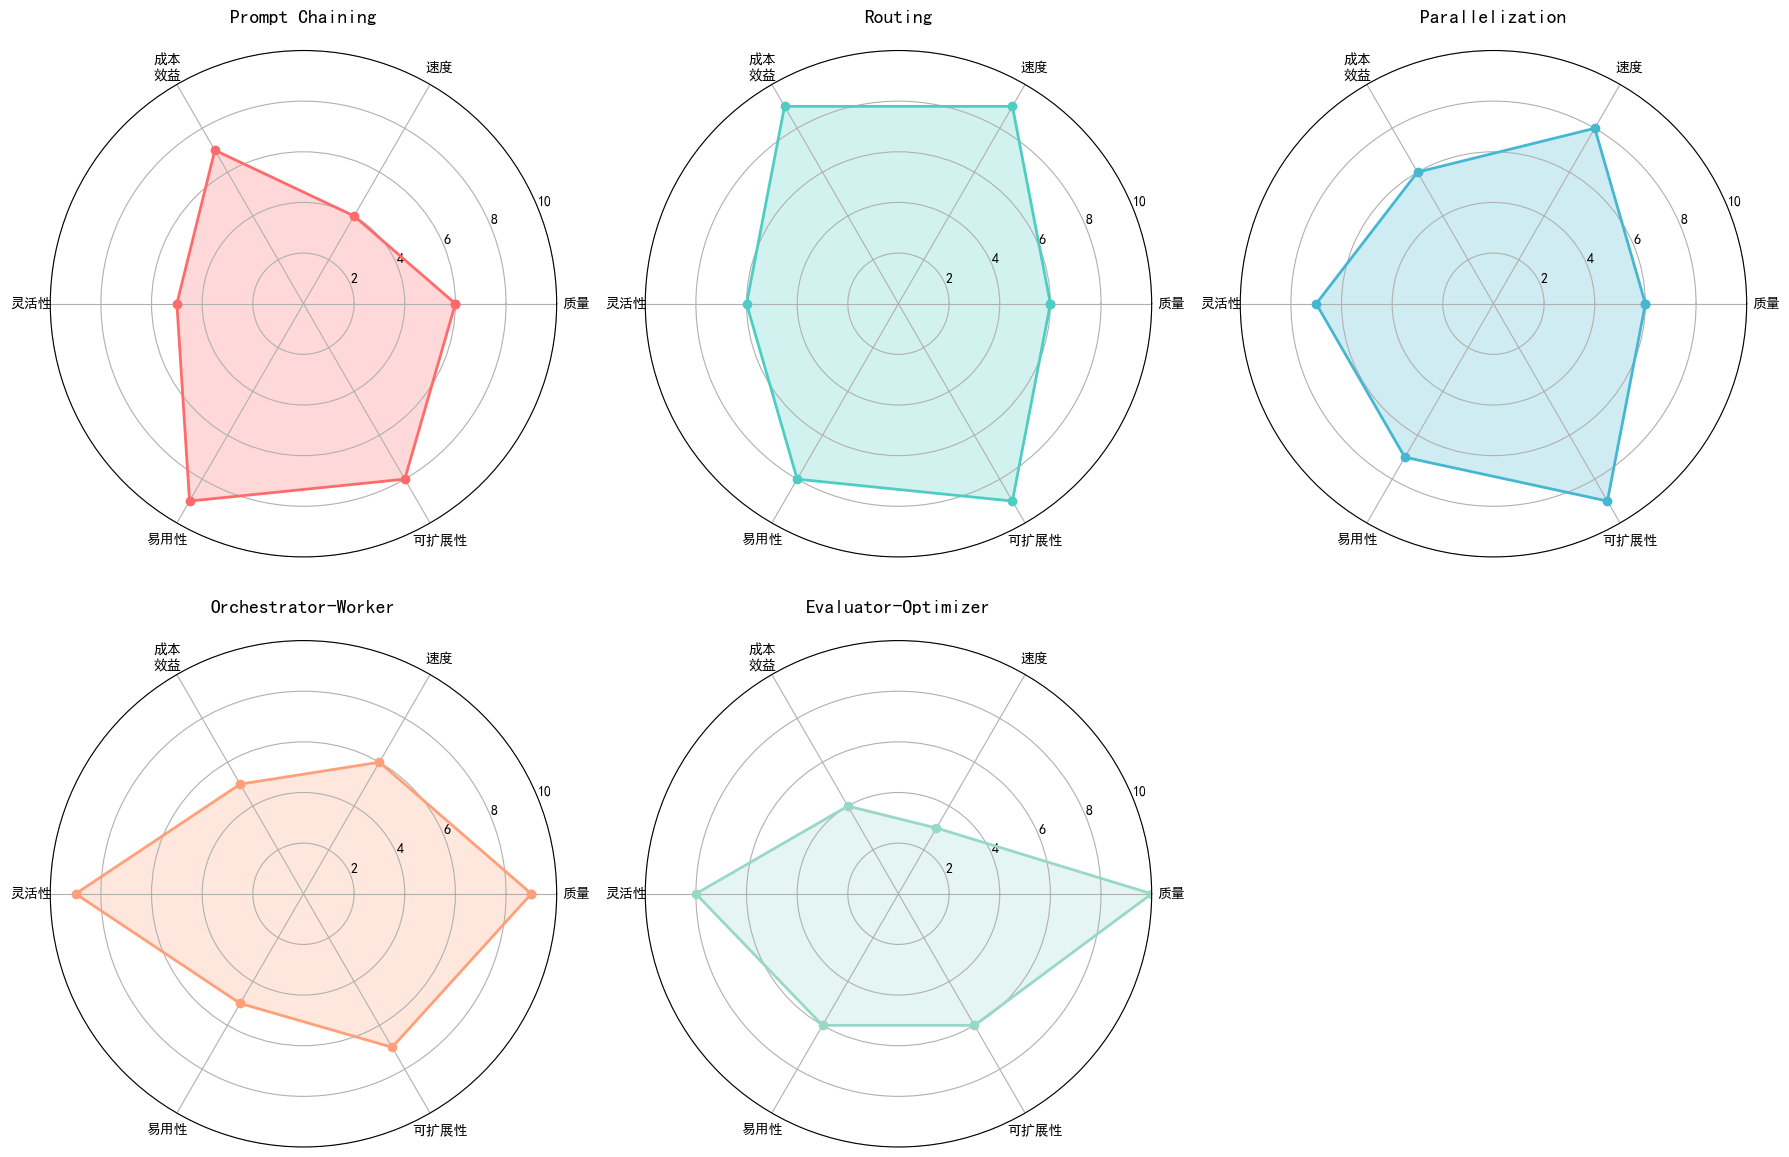

✓ 雷达图已生成


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 创建雷达图对比
categories = ['质量', '速度', '成本\n效益', '灵活性', '易用性', '可扩展性']
N = len(categories)

# 各模式的评分（1-10分）
patterns_scores = {
    'Prompt Chaining': [6, 4, 7, 5, 9, 8],
    'Routing': [6, 9, 9, 6, 8, 9],
    'Parallelization': [6, 8, 6, 7, 7, 9],
    'Orchestrator-Worker': [9, 6, 5, 9, 5, 7],
    'Evaluator-Optimizer': [10, 3, 4, 8, 6, 6]
}

# 创建图表
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(projection='polar'))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# 为每个模式创建雷达图
for idx, (pattern, scores) in enumerate(patterns_scores.items()):
    ax = axes[idx]
    scores_plot = scores + scores[:1]
    
    ax.plot(angles, scores_plot, 'o-', linewidth=2, label=pattern, color=colors[idx])
    ax.fill(angles, scores_plot, alpha=0.25, color=colors[idx])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    ax.set_ylim(0, 10)
    ax.set_title(pattern, size=14, weight='bold', pad=20)
    ax.grid(True)

# 最后一个子图用于图例和总结
axes[5].axis('off')

plt.tight_layout()
plt.savefig('ai_patterns_comparison_radar.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 雷达图已生成")

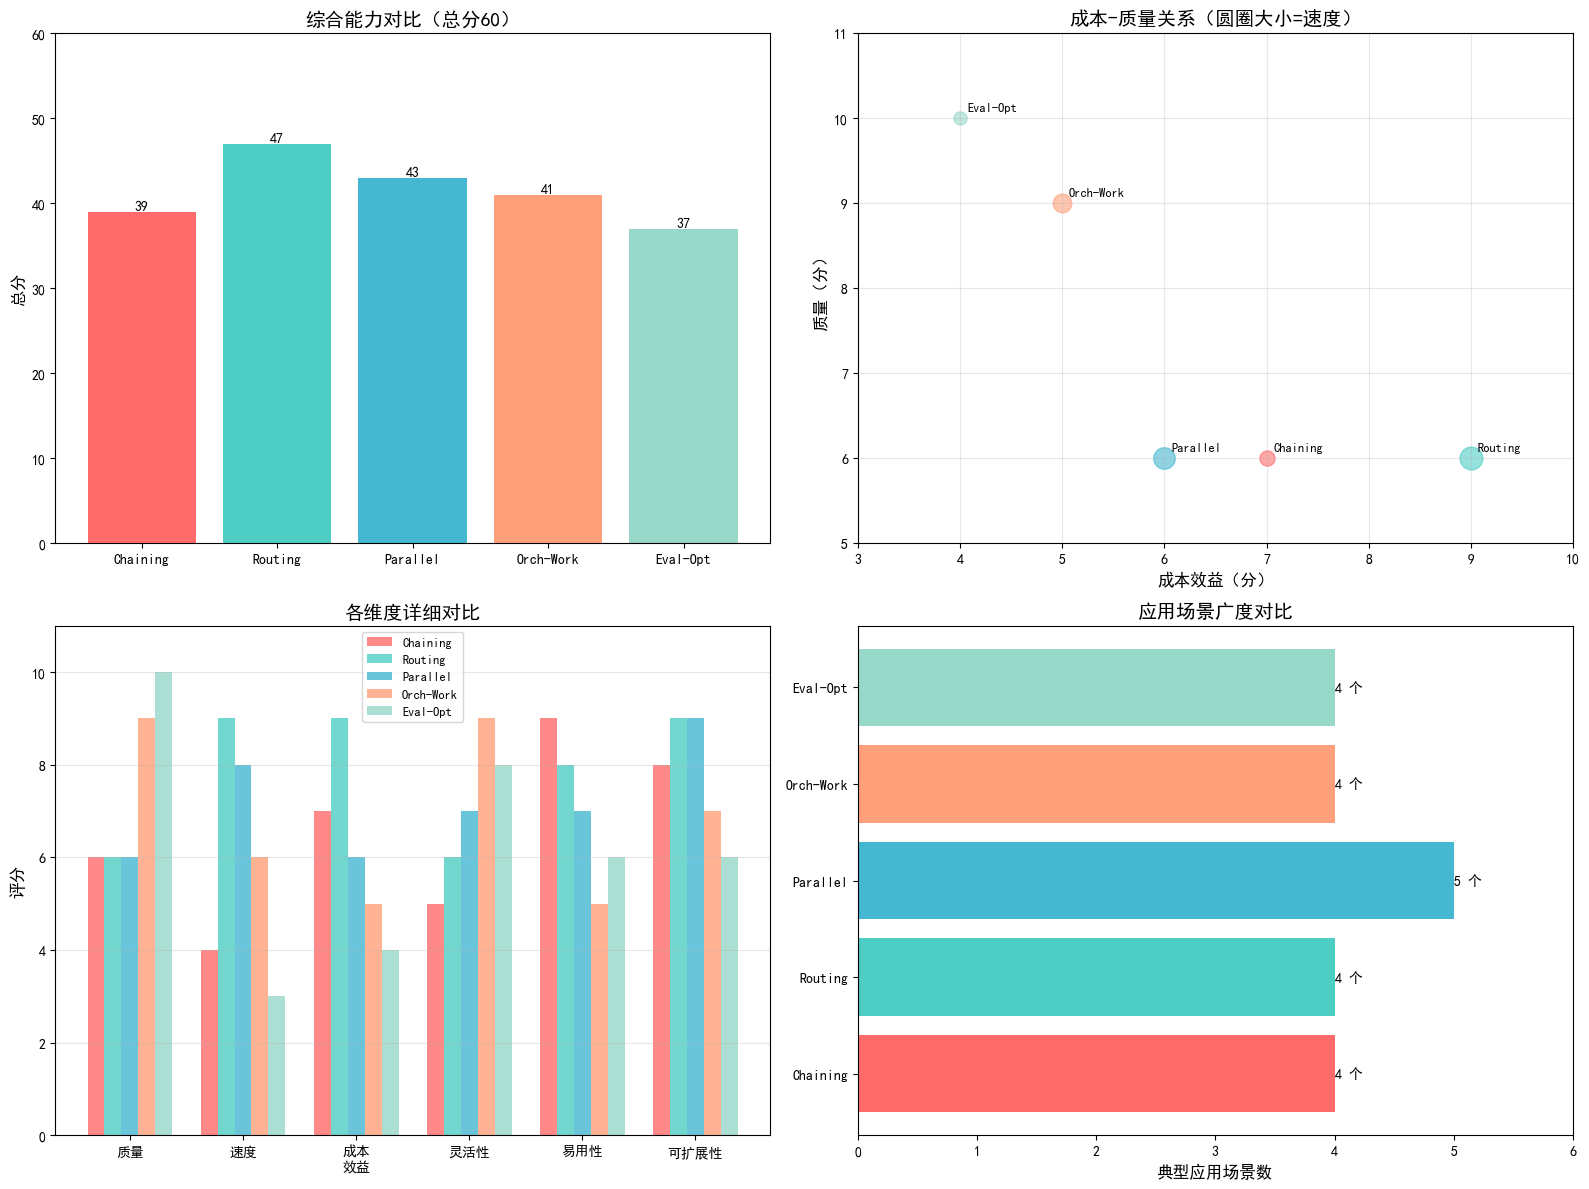

✓ 对比图表已生成


In [ ]:
# 创建对比柱状图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

patterns = list(patterns_scores.keys())
patterns_short = ['Chaining', 'Routing', 'Parallel', 'Orch-Work', 'Eval-Opt']

# 1. 综合评分对比
ax1 = axes[0, 0]
total_scores = [sum(scores) for scores in patterns_scores.values()]
bars1 = ax1.bar(patterns_short, total_scores, color=colors)
ax1.set_ylabel('总分', fontsize=12)
ax1.set_title('综合能力对比（总分60）', fontsize=14, weight='bold')
ax1.set_ylim(0, 60)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# 2. 成本-质量散点图
ax2 = axes[0, 1]
quality = [scores[0] for scores in patterns_scores.values()]
cost_efficiency = [scores[2] for scores in patterns_scores.values()]
sizes = [scores[1] * 30 for scores in patterns_scores.values()]  # 速度决定大小

for i, pattern in enumerate(patterns_short):
    ax2.scatter(cost_efficiency[i], quality[i], s=sizes[i], 
               alpha=0.6, color=colors[i], label=pattern)
    ax2.annotate(pattern, (cost_efficiency[i], quality[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax2.set_xlabel('成本效益（分）', fontsize=12)
ax2.set_ylabel('质量（分）', fontsize=12)
ax2.set_title('成本-质量关系（圆圈大小=速度）', fontsize=14, weight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(3, 10)
ax2.set_ylim(5, 11)

# 3. 各维度堆叠对比
ax3 = axes[1, 0]
categories_data = np.array([list(scores) for scores in patterns_scores.values()])
x = np.arange(len(categories))
width = 0.15

for i, pattern in enumerate(patterns_short):
    ax3.bar(x + i*width, categories_data[i], width, 
           label=pattern, color=colors[i], alpha=0.8)

ax3.set_ylabel('评分', fontsize=12)
ax3.set_title('各维度详细对比', fontsize=14, weight='bold')
ax3.set_xticks(x + width * 2)
ax3.set_xticklabels(categories, fontsize=10)
ax3.legend(fontsize=9)
ax3.set_ylim(0, 11)
ax3.grid(True, alpha=0.3, axis='y')

# 4. 适用场景数量
ax4 = axes[1, 1]
use_case_counts = [4, 4, 5, 4, 4]  # 基于前面定义的use_cases
bars4 = ax4.barh(patterns_short, use_case_counts, color=colors)
ax4.set_xlabel('典型应用场景数', fontsize=12)
ax4.set_title('应用场景广度对比', fontsize=14, weight='bold')
ax4.set_xlim(0, 6)
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
             f'{int(width)} 个',
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('ai_patterns_comparison_charts.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 对比图表已生成")